# Clustering

## Problem Statement

 Sudents have to evaluate a lot of factors before taking a decision to join a university for their higher education requirements.The objective of this project is to simplify the process for appropriate universities which are of similar nature.

CRISP-ML(Q) process model describes six phases:

1.Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Deployment
5. Deployment
6. Monitoring and Maintenance


##### Objective  : Maximize the  convinience of admission process.
##### Constrains: Minimize the brain drain

##### Success Criteria: 
##### Business success criteria: Reduce the application process time from any where between 20% to 40 %
##### Economic success criteria: US Higher education department will see an increase in revenues by atleast 30 %.

##### Proposed Plan: Grouping the available universities will allow to understand the characteristics of each plan.


## Data Collection

#### Importing required packages 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [4]:
# Import the dataset
df = pd.read_excel(r'C:\Users\Swapnil Mishra\Desktop\DS\Hierarchical Clustering\University_Clustering\University_Clustering.xlsx')

In [5]:
df

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


### EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS
##### 1st Moment Business Decision (Measures of Central Tendency)

1.Mean

2.Median

3.Mode

In [6]:
print(df.select_dtypes(include = [np.number]).mean())
print('\n')
print(df.select_dtypes(include = [np.number]).median())
print('\n')
print(df.mode())

UnivID         13.000000
SAT          1266.916667
Top10          76.480000
Accept         39.200000
SFRatio        12.708333
Expenses    27388.000000
GradRate       86.666667
dtype: float64


UnivID         13.0
SAT          1287.5
Top10          81.0
Accept         36.0
SFRatio        12.0
Expenses    27553.0
GradRate       90.0
dtype: float64


    UnivID          Univ State     SAT  Top10  Accept  SFRatio  Expenses  \
0        1         Brown    CA  1260.0   75.0    14.0     11.0      8704   
1        2           CMU    PA  1310.0   89.0    24.0     12.0      9066   
2        3       CalTech   NaN  1375.0   90.0    30.0      NaN     10185   
3        4      Columbia   NaN     NaN   91.0    44.0      NaN     11857   
4        5       Cornell   NaN     NaN   95.0     NaN      NaN     13349   
5        6     Dartmouth   NaN     NaN    NaN     NaN      NaN     15122   
6        7          Duke   NaN     NaN    NaN     NaN      NaN     15140   
7        8    Georgetown   NaN     NaN    N

#### 2nd Moment Business Decision
1. Variance
2. Standard Deviation
3. Range(maximum - minimum)

In [7]:
print(df.select_dtypes(include = [np.number]).var())
print('\n')
print(df.select_dtypes(include = [np.number]).std())

UnivID      5.416667e+01
SAT         1.224643e+04
Top10       3.776767e+02
Accept      3.891667e+02
SFRatio     1.725906e+01
Expenses    2.080773e+08
GradRate    8.553623e+01
dtype: float64


UnivID          7.359801
SAT           110.663578
Top10          19.433905
Accept         19.727308
SFRatio         4.154402
Expenses    14424.883165
GradRate        9.248580
dtype: float64


#### 3rd Moment Business Decision
Measure of asymmetry in the data distribution

In [8]:
df.select_dtypes(include = [np.number]).skew()

UnivID      0.000000
SAT        -0.948996
Top10      -1.219756
Accept      0.867538
SFRatio     1.110628
Expenses    0.852350
GradRate   -0.964565
dtype: float64

#### 4th Moment Business Decision
Measure of peakedness - Represents the overall spread of the data

In [9]:
df.select_dtypes(include = [np.number]).kurt()

UnivID     -1.200000
SAT         0.240543
Top10       0.700307
Accept      0.252908
SFRatio     2.171173
Expenses    0.638162
GradRate   -0.307285
dtype: float64

### Descriptive Statistics and Data Distribution Function

In [10]:
df.describe()

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


### Data Preprocessing and cleaning
##### Typecasting: 1.int to float 2.float to int

In [11]:
df.dtypes

UnivID        int64
Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [12]:
# Change the datatype of feature UnivID (by Typecasting) from int to string
df.UnivID = df.UnivID.astype('str')
df.dtypes

UnivID       object
Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [13]:
# Cleaning unwanted columns
df.drop(['UnivID'],axis = 1, inplace =True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [15]:
# Handling Duplicates

In [16]:
duplicate = df.duplicated() # Returns Boolean series denoting duplicate rows.
print(duplicate)
sum(duplicate)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool


0

In [17]:
# Removing Duplicates
df = df.drop_duplicates() # Returns Dataframe with duplicate rows removed

#### Missing Value Analysis
### Imputation:
#### 1.Mean imputation for numeric data 
#### 2. Median imputation for non-numeric data

In [18]:
# Checks for missing values
df.isnull().sum()

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [19]:
print(df['SAT'])

0     1310.0
1     1415.0
2     1260.0
3     1310.0
4     1280.0
5     1340.0
6     1315.0
7        NaN
8     1400.0
9     1305.0
10    1380.0
11    1260.0
12    1255.0
13    1081.0
14    1375.0
15    1005.0
16    1360.0
17    1075.0
18    1240.0
19    1290.0
20    1180.0
21    1285.0
22    1225.0
23    1085.0
24    1375.0
Name: SAT, dtype: float64


In [20]:
print(df['SFRatio'])

0     13.0
1      6.0
2      9.0
3     12.0
4     13.0
5     10.0
6     12.0
7     12.0
8     11.0
9      7.0
10    10.0
11    11.0
12    13.0
13    18.0
14     8.0
15    19.0
16    12.0
17    25.0
18    17.0
19     NaN
20    16.0
21    11.0
22    14.0
23    15.0
24    11.0
Name: SFRatio, dtype: float64


In [21]:
from sklearn.impute import SimpleImputer

# Mean Imputer
mean_imputer = SimpleImputer(missing_values= np.nan,strategy = 'mean')
df['SAT'] = pd.DataFrame(mean_imputer.fit_transform(df[['SAT']]))
df['SAT'].isna().sum()

0

In [22]:
# Median Imputer
median_imputer = SimpleImputer(missing_values = np.nan,strategy = 'median')
df['SFRatio'] = pd.DataFrame(median_imputer.fit_transform(df[['SFRatio']]))
df['SFRatio'].isna().sum()

0

In [23]:
# Random Imputer
from feature_engine.imputation import RandomSampleImputer
random_imputer = RandomSampleImputer(['GradRate'])
df['GradRate'] = pd.DataFrame(random_imputer.fit_transform(df[['GradRate']]))
df['GradRate'].isna().sum()

0

In [24]:
df.isna().sum()

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

### Single code for Mean Imputation on the entire dataset.

### Alternative Option

In [25]:
df.fillna(df.select_dtypes(include = [np.number]).mean(),inplace = True)

##### Outliers Analysis:
Extreme data values in a variable can be outliers.In case of outliers we can use one of the three strategies of 3R(Rectify,Retain or Remove)

##### Dividing Categorical and Numerical variables from Dataset

In [26]:
df_cate = df.iloc[: , :2]
df_cate.head(10)

,Univ,State
0,Brown,RI
1,CalTech,CA
2,CMU,PA
3,Columbia,NY
4,Cornell,NY
5,Dartmouth,NH
6,Duke,NC
7,Georgetown,DC
8,Harvard,MA
9,JohnsHopkins,MD


In [27]:
df_num = df.iloc[:,2:]
df_num.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.000000,89,22,13.0,22704,94.0
1,1415.000000,100,25,6.0,63575,81.0
2,1260.000000,62,59,9.0,25026,72.0
3,1310.000000,76,24,12.0,31510,94.0
4,1280.000000,83,33,13.0,21864,90.0
5,1340.000000,89,23,10.0,32162,95.0
6,1315.000000,90,30,12.0,31585,95.0
7,1266.916667,74,24,12.0,20126,92.0
8,1400.000000,91,14,11.0,39525,97.0
9,1305.000000,75,44,7.0,58691,87.0


### Box Plot
Visualize numeric data using boxplot for outliers

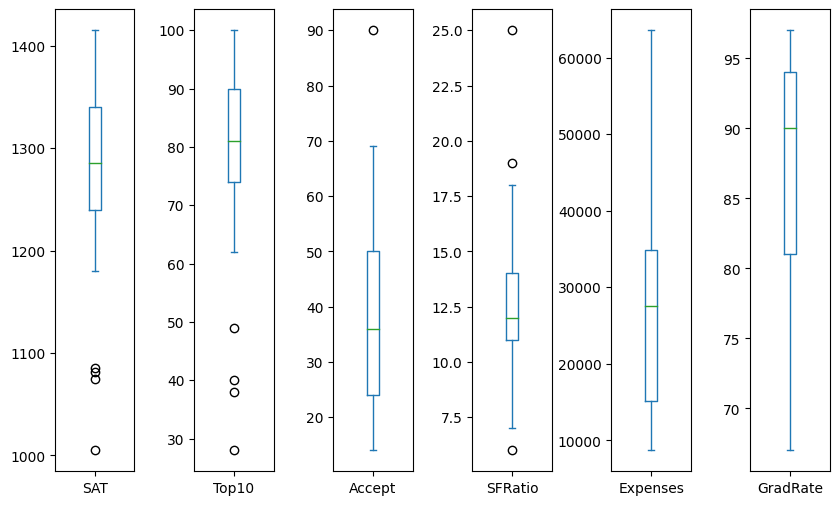

In [28]:
# Multiple boxplots in a single visualization 
# Columns with larger scales affect other columns.
# Below code ensures each column gets its own y-axis.
# pandas.plot() function with parameters kind = 'box' and subplots = True
df_num.plot(kind = 'box' ,subplots = True , sharey = False , figsize = (10,6))

# increase spacing between subplots 
plt.subplots_adjust(wspace=0.75)
# ws is the width of the padding between subplots, as a fraction of the
# average Axes width.
plt.show()

In [29]:
# Boxplots show outliers in : SAT,Top10,Accept,SFRatio.
# Outlier Analysis 
# We shall use Winsorization Technique to treat outliers
# Winsorization function rounds off the exceptional data points based on 
# Capping method used in parameters/hyperparameters selection.

In [30]:
# D-Tale
# pip install dtale
import dtale
d = dtale.show(df)
d.open_browser()

In [31]:
# Winsorization for 'SAT','Top10','Accept','SFRatio' Column
winsor = Winsorizer(capping_method = 'iqr',# Choose IQR rule boundary
                   tail = 'both',# cap left,right or both tails
                   fold = 1.5,
                   variables = ['SAT'])
df_num['SAT'] = winsor.fit_transform(df_num[['SAT']]) # this replaces the outliers to cap values 

In [32]:
winsor = Winsorizer(capping_method='iqr',
                   tail = 'both',
                   fold = 1.5,
                   variables = ['Top10'])
df_num['Top10'] = winsor.fit_transform(df_num[['Top10']])

In [33]:
winsor = Winsorizer(capping_method = 'iqr',
                   tail = 'both',
                   fold = 1.5,
                   variables = ['Accept'])
df_num['Accept'] = winsor.fit_transform(df_num[['Accept']])

In [34]:
winsor = Winsorizer(capping_method='iqr',
                   tail = 'both',
                   fold = 1.5,
                   variables = ['SFRatio'])
df_num['SFRatio'] = winsor.fit_transform(df_num[['SFRatio']])

In [35]:
# Verify for outliers post the treatment

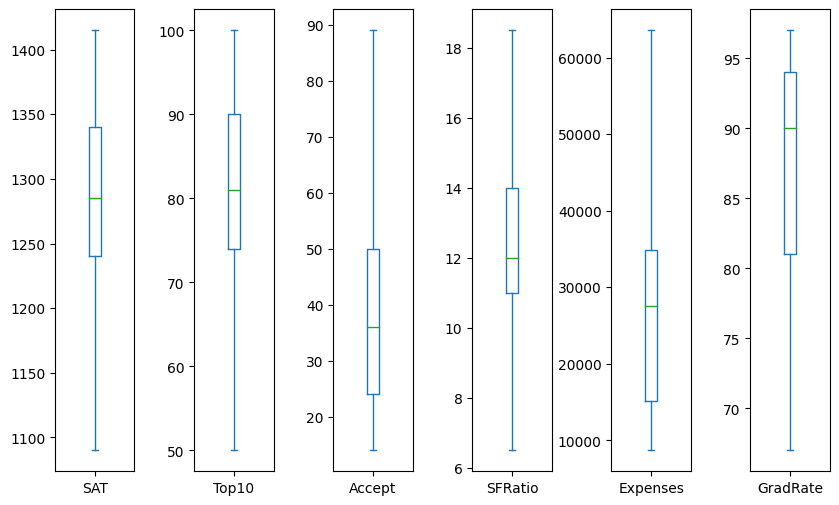

In [36]:
df_num.plot(kind = 'box' , subplots = True , sharey = False,figsize = (10,6))

# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

#### Zero and Near Zero Variance

In [37]:
df_num.var()

SAT         9.718958e+03
Top10       2.446267e+02
Accept      3.849733e+02
SFRatio     1.105583e+01
Expenses    2.080773e+08
GradRate    8.412333e+01
dtype: float64

#### Descritization / Binning / Grouping
The process of converting continuous data into descrete number of bins.
The current business requirement does not justify the descritization/binning 
requirement for any column.


### Dummy Variable Creation

In [38]:
df.dtypes

Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       25 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   25 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  25 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [40]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Univ    25 non-null     object
 1   State   25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


In [41]:
print(df_cate.State.unique())
print('\n')
print(df_cate.State.value_counts())

['RI' 'CA' 'PA' 'NY' 'NH' 'NC' 'DC' 'MA' 'MD' 'IL' 'IN' 'NJ' 'TX' 'MI'
 'VA' 'WI' 'CT']


State
PA    3
CA    3
NY    2
MA    2
IL    2
IN    2
RI    1
TX    1
WI    1
VA    1
MI    1
MD    1
NJ    1
DC    1
NC    1
NH    1
CT    1
Name: count, dtype: int64


In [42]:
# Univ name is an identity and does not require to be converted into numeric 
# State column is an important field so it has to be converted into Numeric.

In [43]:
# Applying one-hot encoding with dummies 
df_cate = pd.get_dummies(df_cate, columns=['State'],drop_first= True)

In [44]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State_CT  25 non-null     bool  
 2   State_DC  25 non-null     bool  
 3   State_IL  25 non-null     bool  
 4   State_IN  25 non-null     bool  
 5   State_MA  25 non-null     bool  
 6   State_MD  25 non-null     bool  
 7   State_MI  25 non-null     bool  
 8   State_NC  25 non-null     bool  
 9   State_NH  25 non-null     bool  
 10  State_NJ  25 non-null     bool  
 11  State_NY  25 non-null     bool  
 12  State_PA  25 non-null     bool  
 13  State_RI  25 non-null     bool  
 14  State_TX  25 non-null     bool  
 15  State_VA  25 non-null     bool  
 16  State_WI  25 non-null     bool  
dtypes: bool(16), object(1)
memory usage: 728.0+ bytes


In [45]:
# The dimension of the dataset after One-Hot Encoding
df_cate.shape

(25, 17)

In [46]:
df_cate.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,State_NY,State_PA,State_RI,State_TX,State_VA,State_WI
0,Brown,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,CalTech,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,CMU,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,Columbia,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,Cornell,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


## Graphical Representaion

In [50]:
# pip install PyQt5 pyqtwebengine --user

In [51]:
%matplotlib inline 

In [52]:
df_num.columns

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

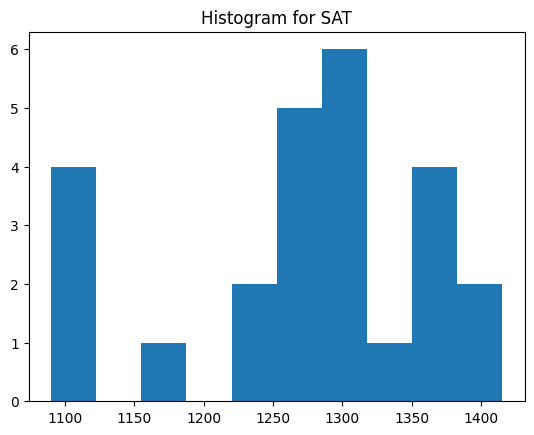

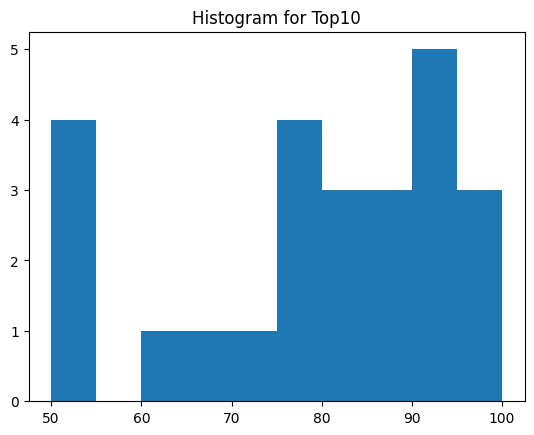

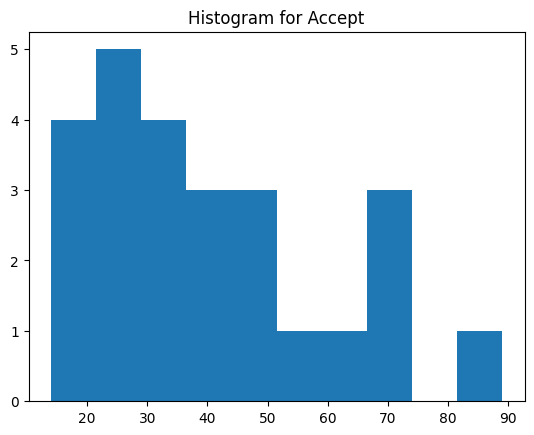

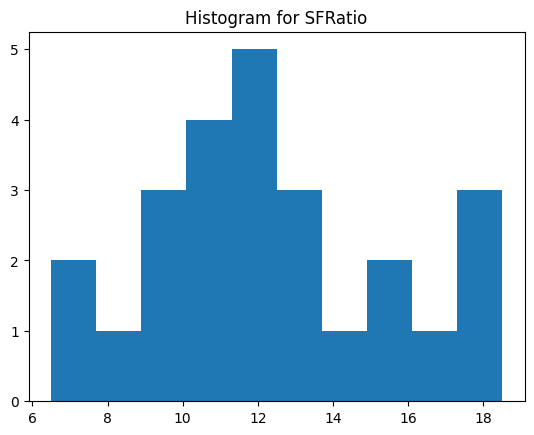

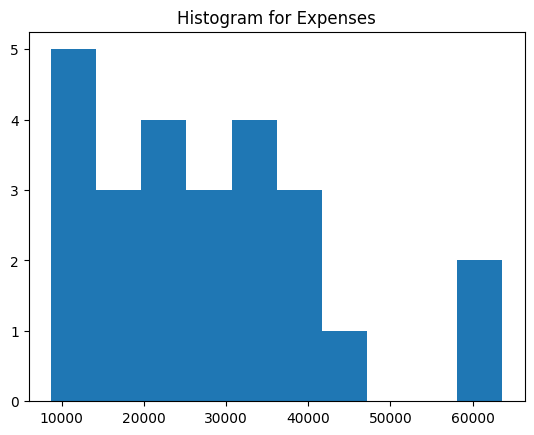

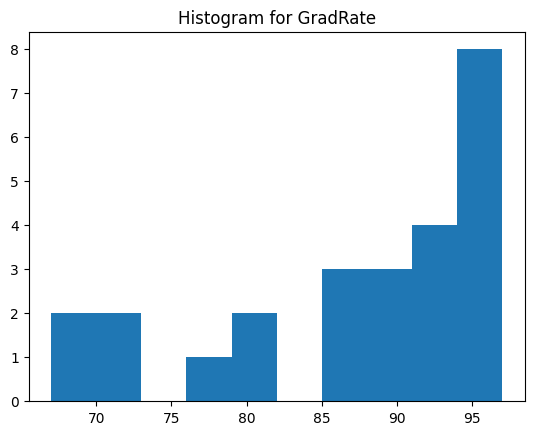

In [53]:
# Histogram desscribes the spread of data
for i in df_num.columns:
    plt.hist(x = df_num[i])
    plt.title('Histogram for ' + str(i))
    plt.show()

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1090.        , 1090.        , 1090.        , 1090.        ,
         1180.        , 1225.        , 1240.        , 1255.        ,
         1260.        , 1260.        , 1266.91666667, 1280.        ,
         1285.        , 1290.        , 1305.        , 1310.        ,
         1310.        , 1315.        , 1340.        , 1360.        ,
         1375.        , 1375.        , 1380.        , 1400.        ,
         1415.        ])),
 (98.76659036154764, 1271.4766666666667, 0.9585447047103507))

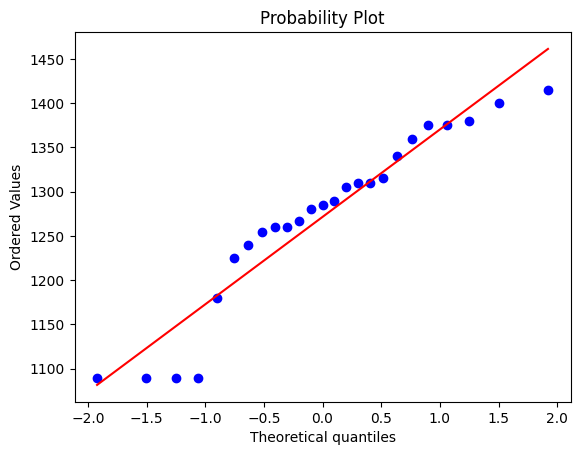

In [54]:
# Normal Quantile Quantile plot 
# (Helps to understand the distribution of the data - Normal or Not )
import scipy.stats as stats
import pylab

# Checking weather data is normally distributed
stats.probplot(df_num.SAT , dist = 'norm' , plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 50,  50,  50,  50,  62,  65,  74,  75,  75,  76,  77,  80,  81,
          83,  85,  89,  89,  90,  90,  91,  91,  94,  95,  95, 100],
        dtype=int64)),
 (15.548174662321602, 78.28, 0.9511295549439862))

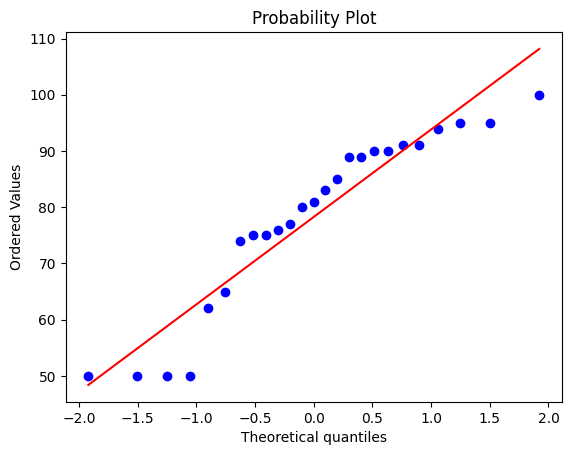

In [55]:
# Checking whether data is normally distributed 
stats.probplot(df_num.Top10 , dist = 'norm' , plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([14, 14, 19, 20, 22, 23, 24, 24, 25, 30, 30, 33, 36, 39, 40, 42, 44,
         44, 50, 54, 59, 67, 68, 69, 89], dtype=int64)),
 (19.806179416701234, 39.16, 0.9658230149511989))

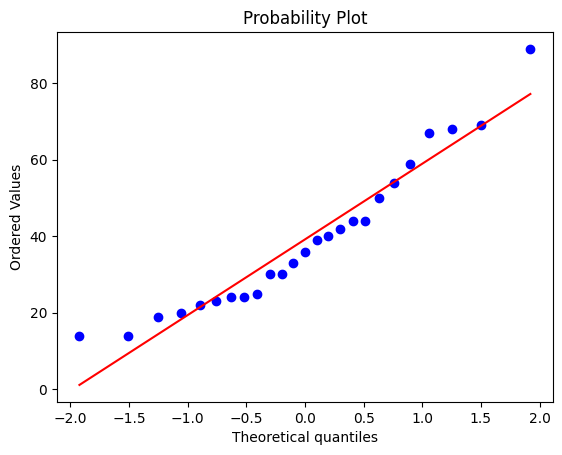

In [56]:
# Checking whether data is normally distributed
stats.probplot(df_num.Accept , dist = 'norm' , plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 6.5,  7. ,  8. ,  9. , 10. , 10. , 11. , 11. , 11. , 11. , 12. ,
         12. , 12. , 12. , 12. , 13. , 13. , 13. , 14. , 15. , 16. , 17. ,
         18. , 18.5, 18.5])),
 (3.4058243652179456, 12.42, 0.9800284234738135))

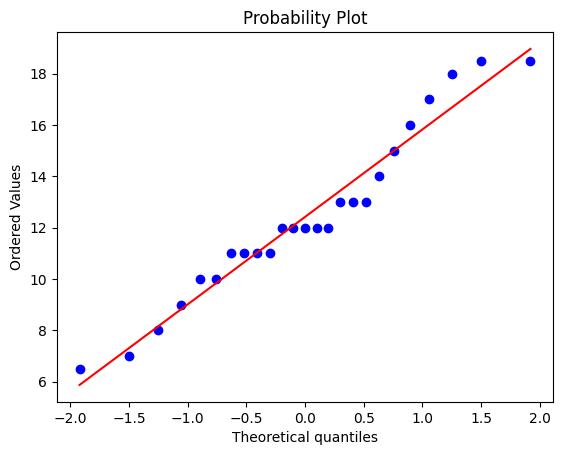

In [57]:
# Checking whether data is normally distributed or not 
stats.probplot(df_num.SFRatio , dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 8704,  9066, 10185, 11857, 13349, 15122, 15140, 15470, 20126,
         21864, 22704, 25026, 27553, 28052, 30220, 31510, 31585, 32162,
         34870, 36450, 38380, 39525, 43514, 58691, 63575], dtype=int64)),
 (14567.431669324984, 27387.999999999996, 0.96623519023699))

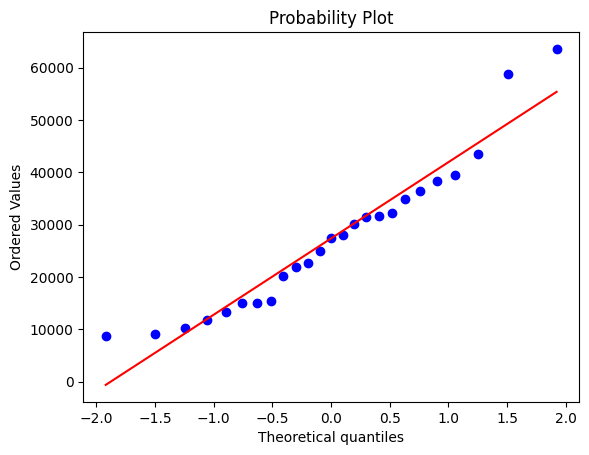

In [58]:
#checking whether the data is normally distributed or not
stats.probplot(df_num.Expenses , dist = 'norm' , plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([67., 69., 71., 72., 78., 80., 81., 85., 87., 87., 89., 90., 90.,
         91., 92., 92., 93., 94., 94., 94., 95., 95., 95., 96., 97.])),
 (8.918362994119335, 86.96, 0.9303343867415096))

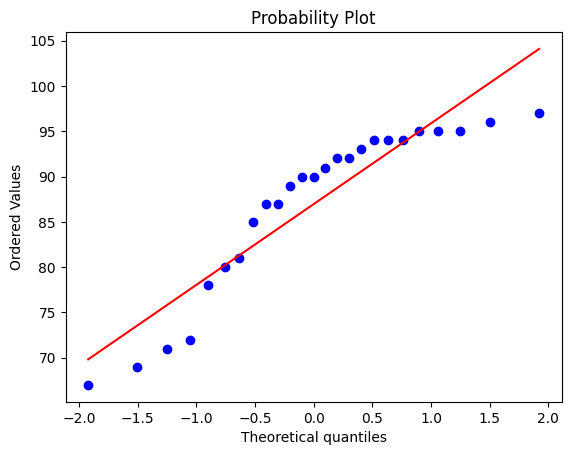

In [59]:
#checking whether the data is normally distributed or not
stats.probplot(df_num.GradRate , dist = 'norm' , plot = pylab)

### Concatenate the Entire Data

In [60]:
df1 = pd.concat([df_cate, df_num], axis = 1)  # Preprocessed data for clustering
df1.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,False,False,False,False,False,False,False,False,False,...,True,False,False,False,1310.0,89,22,13.0,22704,94.0
1,CalTech,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1415.0,100,25,6.5,63575,81.0
2,CMU,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1260.0,62,59,9.0,25026,72.0
3,Columbia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1310.0,76,24,12.0,31510,94.0
4,Cornell,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1280.0,83,33,13.0,21864,90.0


In [61]:
df1.shape

(25, 23)

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State_CT  25 non-null     bool   
 2   State_DC  25 non-null     bool   
 3   State_IL  25 non-null     bool   
 4   State_IN  25 non-null     bool   
 5   State_MA  25 non-null     bool   
 6   State_MD  25 non-null     bool   
 7   State_MI  25 non-null     bool   
 8   State_NC  25 non-null     bool   
 9   State_NH  25 non-null     bool   
 10  State_NJ  25 non-null     bool   
 11  State_NY  25 non-null     bool   
 12  State_PA  25 non-null     bool   
 13  State_RI  25 non-null     bool   
 14  State_TX  25 non-null     bool   
 15  State_VA  25 non-null     bool   
 16  State_WI  25 non-null     bool   
 17  SAT       25 non-null     float64
 18  Top10     25 non-null     int64  
 19  Accept    25 non-null     int64  
 20  SFRatio   25 non-null     float64


## Bivariate Analysis

### Scatter Plot

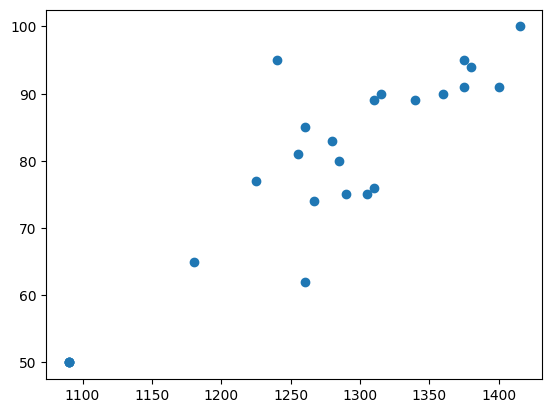

In [63]:
plt.scatter(x = df1['SAT'] , y = df1['Top10'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



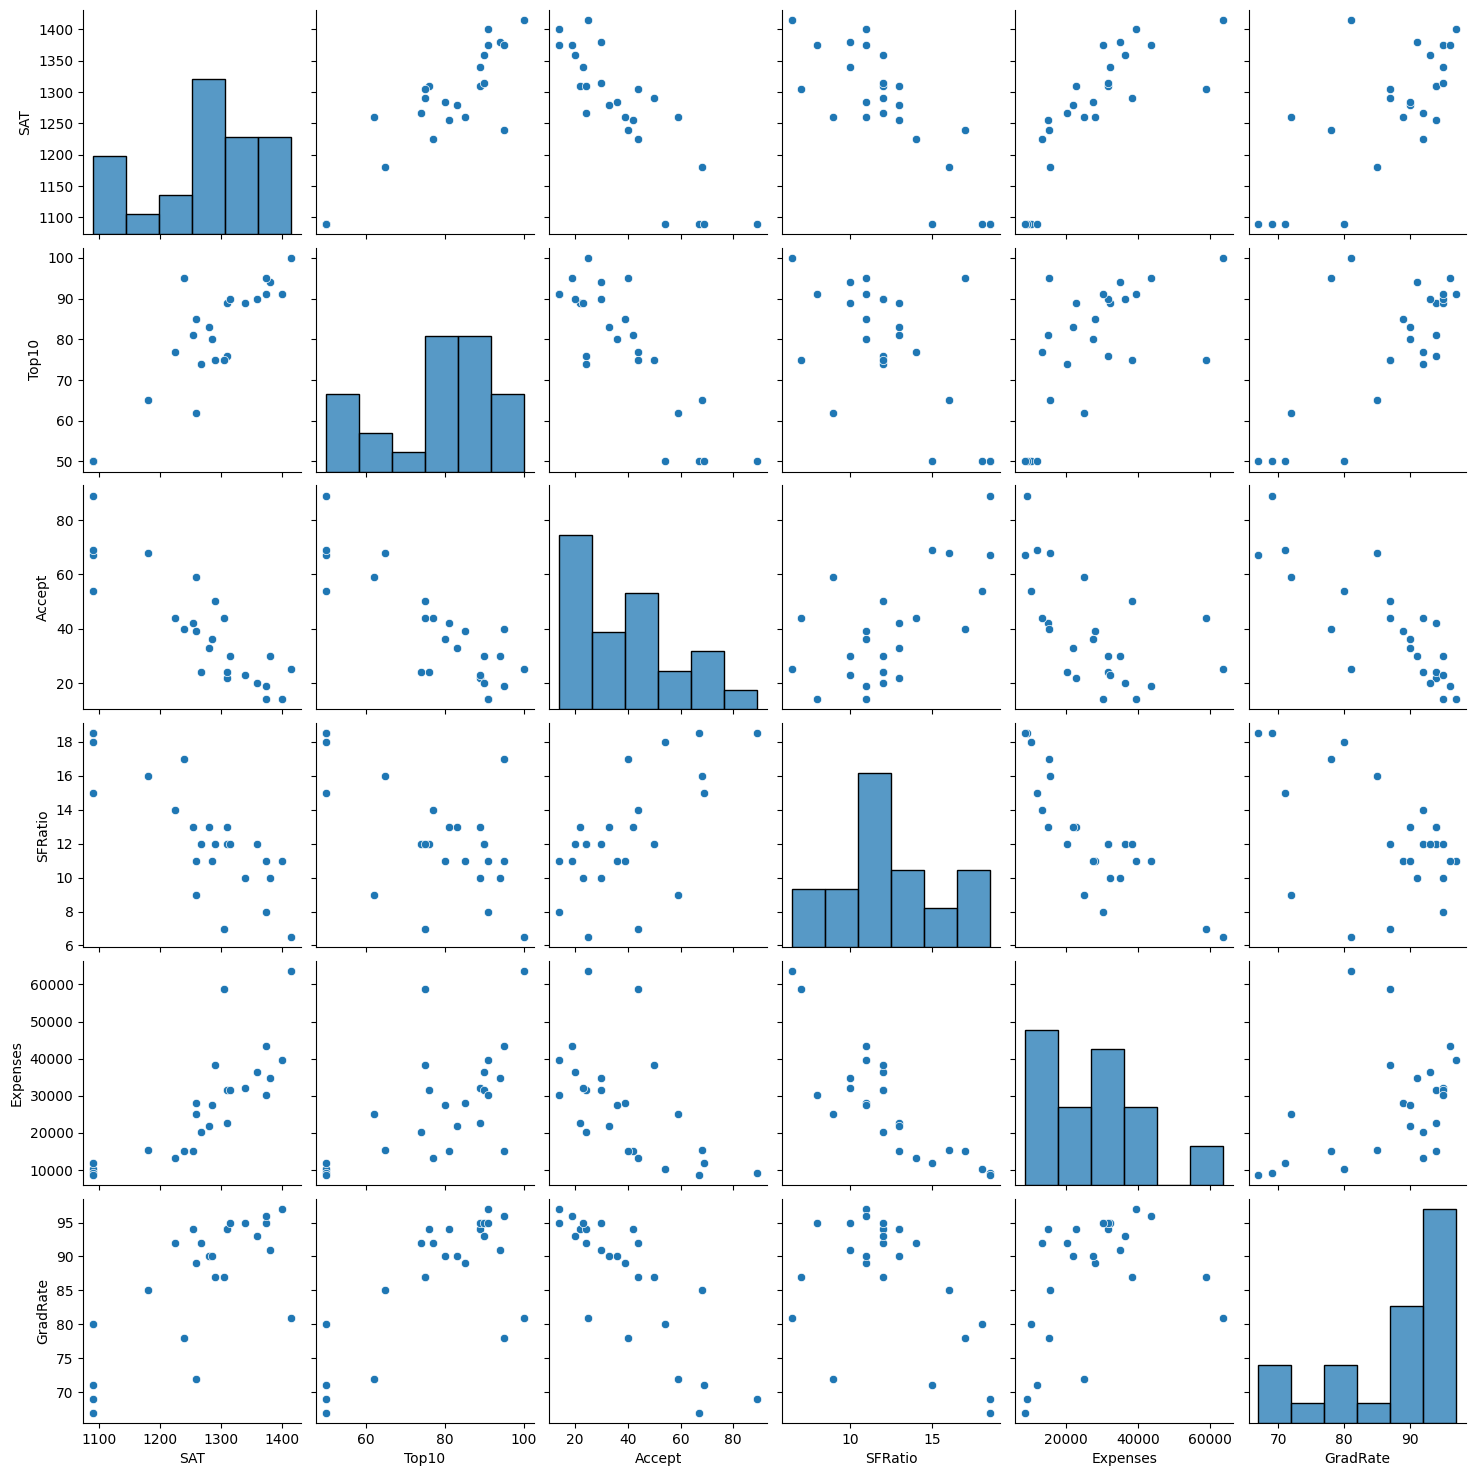

In [64]:
sns.pairplot(df_num)

### Heatmap

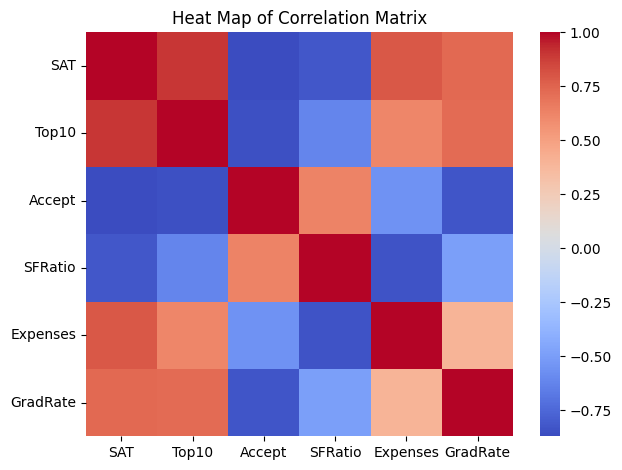

In [65]:
corrmatrix = df_num.corr(method = 'pearson')
sns.heatmap(corrmatrix , xticklabels = corrmatrix.columns , yticklabels = corrmatrix.columns , cmap = 'coolwarm')
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

### Scaling using Normalization
The scale/magnitude of the data will be covered to min = 0 and max = 1

In [66]:
def norm_func(i):
    # Ensure the DataFrame only contains numeric columns
    i = i.select_dtypes(include=['number'])
    
    # Perform normalization
    x = (i - i.min()) / (i.max() - i.min())
    
    return x

# Apply normalization to numeric columns only
df_norm = norm_func(df1.iloc[:, 1:])
print(df_norm)

         SAT  Top10    Accept   SFRatio  Expenses  GradRate
0   0.676923   0.78  0.106667  0.541667  0.255144  0.900000
1   1.000000   1.00  0.146667  0.000000  1.000000  0.466667
2   0.523077   0.24  0.600000  0.208333  0.297461  0.166667
3   0.676923   0.52  0.133333  0.458333  0.415629  0.900000
4   0.584615   0.66  0.253333  0.541667  0.239835  0.766667
5   0.769231   0.78  0.120000  0.291667  0.427512  0.933333
6   0.692308   0.80  0.213333  0.458333  0.416996  0.933333
7   0.544359   0.48  0.133333  0.458333  0.208161  0.833333
8   0.953846   0.82  0.000000  0.375000  0.561699  1.000000
9   0.661538   0.50  0.400000  0.041667  0.910991  0.666667
10  0.892308   0.88  0.213333  0.291667  0.476864  0.800000
11  0.523077   0.70  0.333333  0.375000  0.352609  0.733333
12  0.507692   0.62  0.373333  0.541667  0.116965  0.900000
13  0.000000   0.00  0.533333  0.958333  0.026991  0.433333
14  0.876923   0.82  0.000000  0.125000  0.392120  0.933333
15  0.000000   0.00  1.000000  1.000000 

In [67]:
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.558390,0.565600,0.335467,0.493333,0.340508,0.665333
std,0.303338,0.312811,0.261610,0.277086,0.262887,0.305729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.480000,0.133333,0.375000,0.117293,0.466667
50%,0.600000,0.620000,0.293333,0.458333,0.343515,0.766667
75%,0.769231,0.800000,0.480000,0.625000,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_num.corr()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
SAT,1.000000,0.901663,-0.870891,-0.826604,0.793024,0.735730
Top10,0.901663,1.000000,-0.849428,-0.618479,0.615067,0.723314
Accept,-0.870891,-0.849428,1.000000,0.629935,-0.558775,-0.830708
SFRatio,-0.826604,-0.618479,0.629935,1.000000,-0.836756,-0.498113
Expenses,0.793024,0.615067,-0.558775,-0.836756,1.000000,0.396484
GradRate,0.735730,0.723314,-0.830708,-0.498113,0.396484,1.000000


## Clustering Model Building

### Hierarchical Clustering - Agglomerative Clustering

In [69]:
# Libraries for creating dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

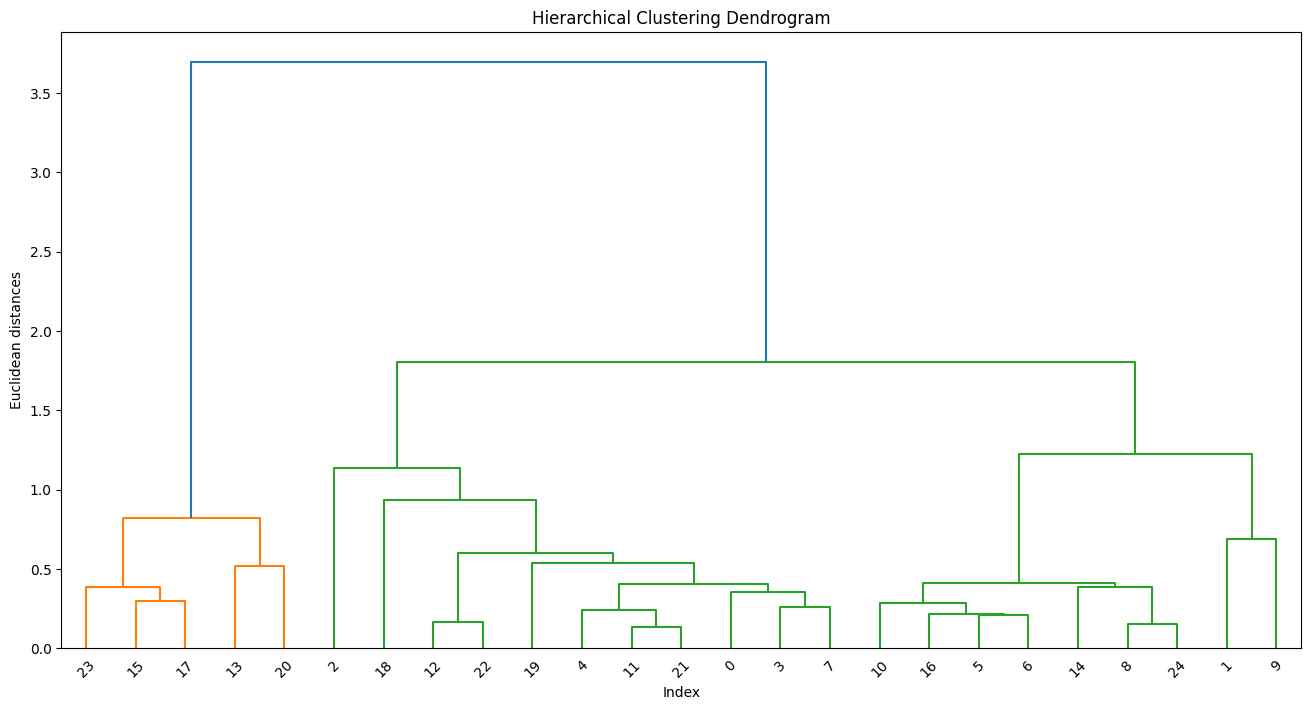

In [70]:
plt.figure(1,figsize=(16,8))
tree_plot = dendrogram(linkage(df_norm,method = 'ward'))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [71]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')

y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0,
       0, 1, 2], dtype=int64)

In [72]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc2 = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_norm)
y_hc2

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [73]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc3 = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_norm)
y_hc3

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [74]:
hc1.labels_   
# Refering to the results obtained from linkage = 'complete' method

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0,
       0, 1, 2], dtype=int64)

In [75]:
cluster_labels = pd.Series(hc1.labels_)

In [76]:
# Add Cluster labels to orignal Dataset

df['cluster'] = cluster_labels
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0,2
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,0
3,Columbia,NY,1310.0,76,24,12.0,31510,94.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


# Cluster Evaluation


In [77]:
df.head() # The final dataframe with cluster ID's

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0,2
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,0
3,Columbia,NY,1310.0,76,24,12.0,31510,94.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [78]:
df2 = df.sort_values(by = 'cluster', ascending = True)
df2

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,RI,1310.000000,89,22,13.0,22704,94.0,0
22,UVA,VA,1225.000000,77,44,14.0,13349,92.0,0
21,UPenn,PA,1285.000000,80,36,11.0,27553,90.0,0
18,UCBerkeley,CA,1240.000000,95,40,17.0,15140,78.0,0
11,Northwestern,IL,1260.000000,85,39,11.0,28052,89.0,0
7,Georgetown,DC,1266.916667,74,24,12.0,20126,92.0,0
12,NotreDame,IN,1255.000000,81,42,13.0,15122,94.0,0
2,CMU,PA,1260.000000,62,59,9.0,25026,72.0,0
4,Cornell,NY,1280.000000,83,33,13.0,21864,90.0,0
3,Columbia,NY,1310.000000,76,24,12.0,31510,94.0,0


In [79]:
# Aggregate by doing mean of each cluster
df2.iloc[:, 2:9].groupby(df2.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
cluster,,,,,,,
0,1269.191667,80.2,36.3,12.5,22044.6,88.5,0.0
1,1085.200000,44.0,69.6,18.6,11056.4,74.4,1.0
2,1355.500000,89.0,26.9,9.9,40897.2,91.7,2.0


In [80]:
cluster0 = df2.loc[(df2.cluster == 0), :]
cluster0

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,RI,1310.000000,89,22,13.0,22704,94.0,0
22,UVA,VA,1225.000000,77,44,14.0,13349,92.0,0
21,UPenn,PA,1285.000000,80,36,11.0,27553,90.0,0
18,UCBerkeley,CA,1240.000000,95,40,17.0,15140,78.0,0
11,Northwestern,IL,1260.000000,85,39,11.0,28052,89.0,0
7,Georgetown,DC,1266.916667,74,24,12.0,20126,92.0,0
12,NotreDame,IN,1255.000000,81,42,13.0,15122,94.0,0
2,CMU,PA,1260.000000,62,59,9.0,25026,72.0,0
4,Cornell,NY,1280.000000,83,33,13.0,21864,90.0,0
3,Columbia,NY,1310.000000,76,24,12.0,31510,94.0,0


In [81]:
cluster1 = df2.loc[(df2.cluster == 1), :]
cluster1

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
15,Purdue,IN,1005.0,28,90,19.0,9066,69.0,1
20,UMichigan,MI,1180.0,65,68,16.0,15470,85.0,1
23,UWisconsin,WI,1085.0,40,69,15.0,11857,71.0,1
13,PennState,PA,1081.0,38,54,18.0,10185,80.0,1
17,TexasA&M,TX,1075.0,49,67,25.0,8704,67.0,1


In [82]:
cluster2 = df2.loc[(df2.cluster == 2), :]
cluster2

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0,2
19,UChicago,IL,1290.0,75,50,12.0,38380,87.0,2
5,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0,2
6,Duke,NC,1315.0,90,30,12.0,31585,95.0,2
14,Princeton,NJ,1375.0,91,14,8.0,30220,95.0,2
10,MIT,MA,1380.0,94,30,10.0,34870,91.0,2
9,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0,2
8,Harvard,MA,1400.0,91,14,11.0,39525,97.0,2
16,Stanford,CA,1360.0,90,20,12.0,36450,93.0,2
24,Yale,CT,1375.0,95,19,11.0,43514,96.0,2


In [83]:
cluster0.to_csv('University_0.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Swapnil Mishra\\Desktop\\DS_Codes_Swapnil\\Hierarchical Clustering'

In [84]:
cluster1.to_csv('University_1.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Swapnil Mishra\\Desktop\\DS_Codes_Swapnil\\Hierarchical Clustering'

In [85]:
cluster2.to_csv('University_2.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Swapnil Mishra\\Desktop\\DS_Codes_Swapnil\\Hierarchical Clustering'

## Another way of evaluating clusters is using outliers

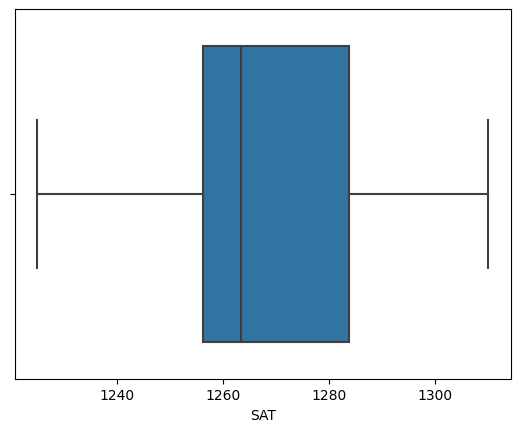

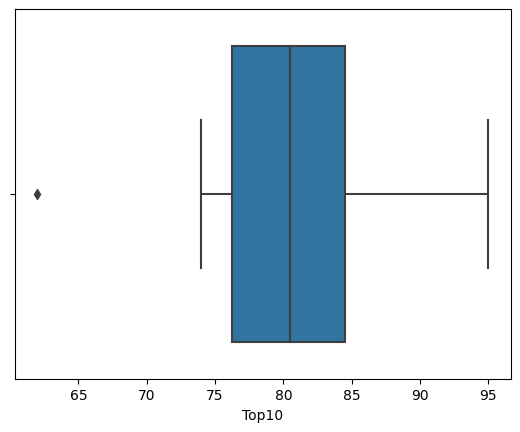

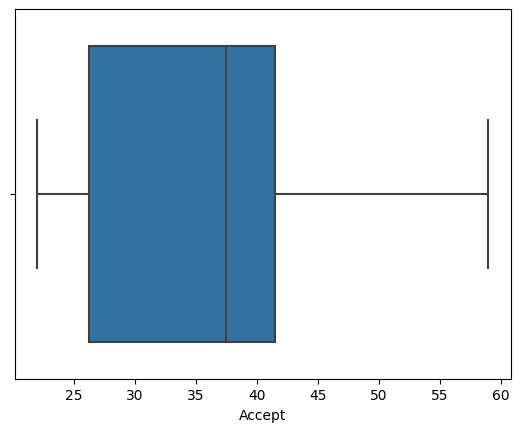

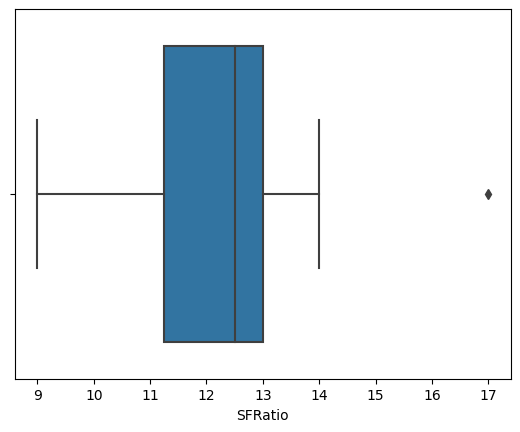

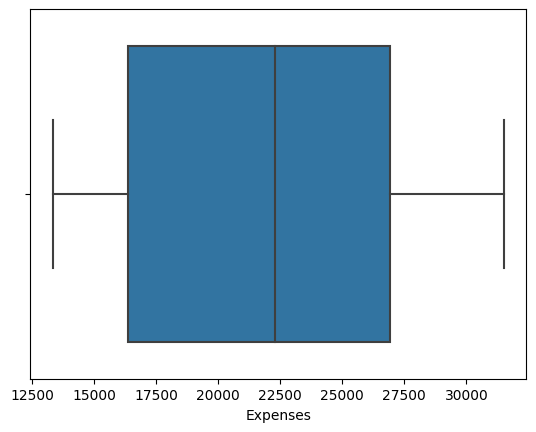

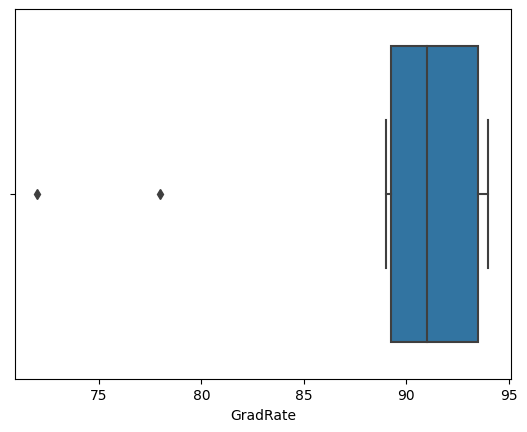

In [86]:
for i in cluster0.columns[2:8]:
  sns.boxplot(x = cluster0[i])
  plt.show()

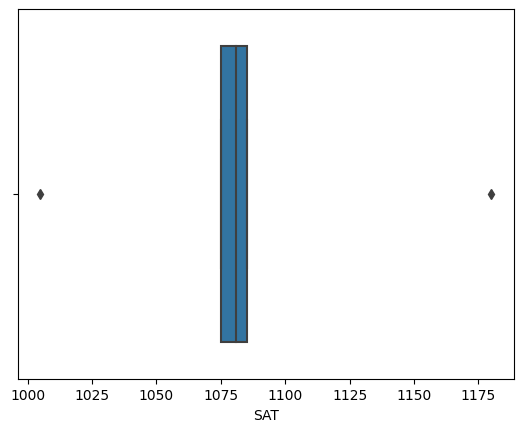

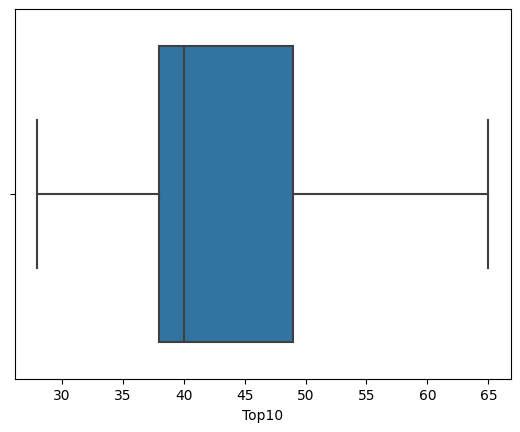

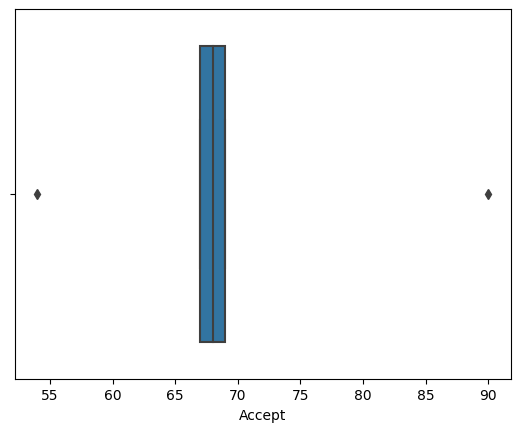

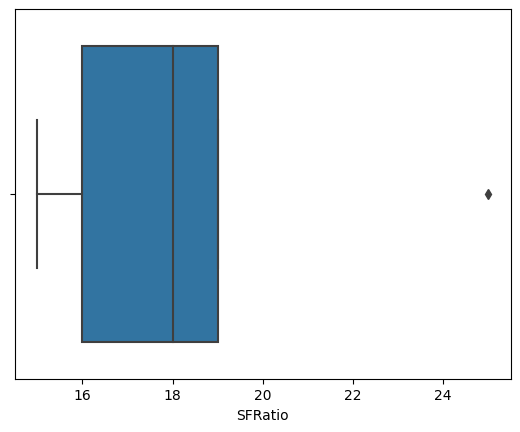

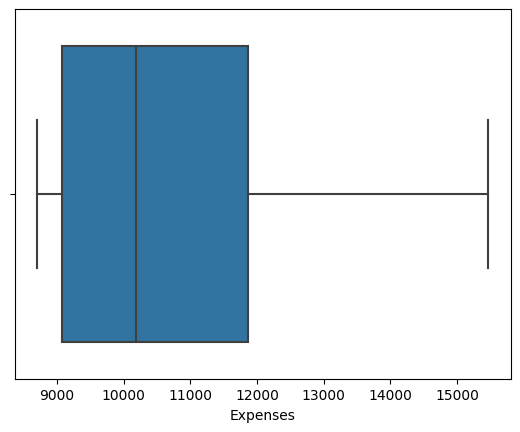

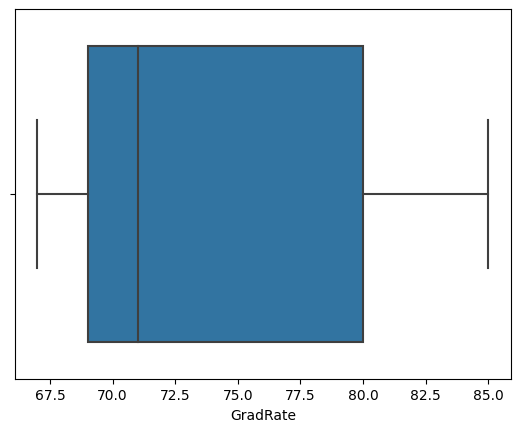

In [87]:
for i in cluster1.columns[2:8]:
  sns.boxplot(x = cluster1[i])
  plt.show()

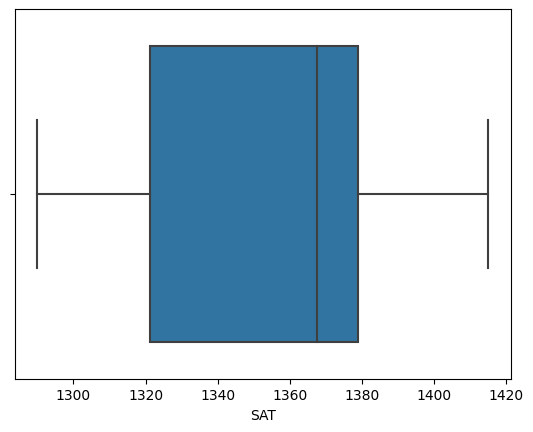

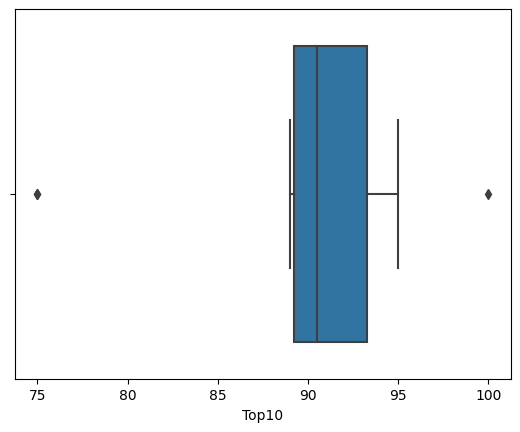

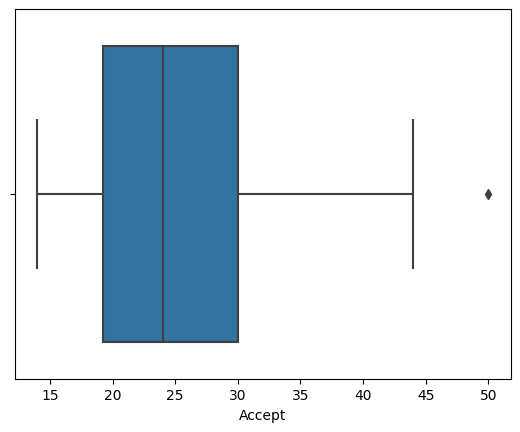

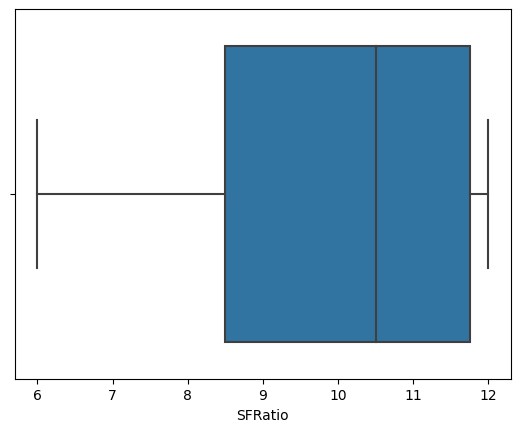

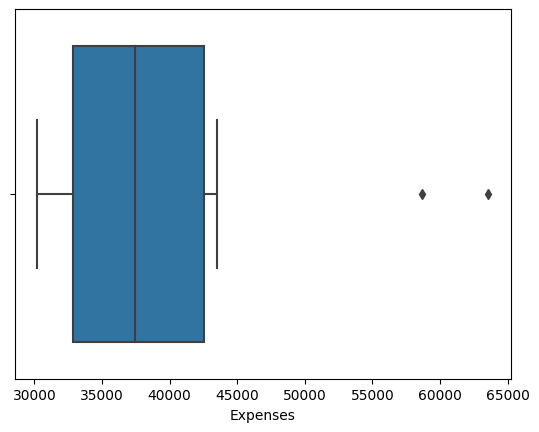

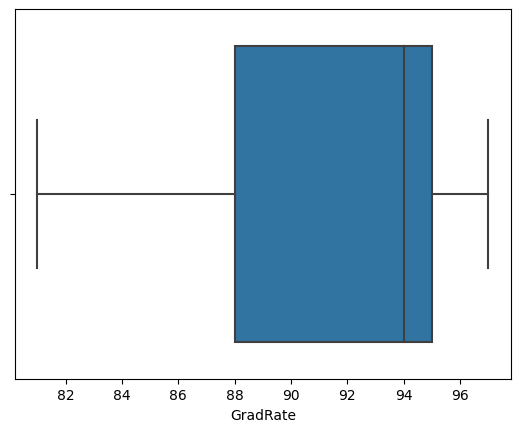

In [88]:
for i in cluster2.columns[2:8]:
  sns.boxplot(x = cluster2[i])
  plt.show()

In [1]:
# !pip install clusteval

## Cluster Evaluation

### Silhoutte coefficient

Silhoutte coefficient: Silhoutte coefficient is a Metric , which is used for calculating goodness of clustering technique and the value ranges between (-1 to +1). It tells us how similar an object is to its own cluster (cohesion) compared to other clusters (seperation).

A score of 1 denotes the best meaning that the data point is very compact within the cluster to which it belongs and far away from other clusters.

Values near 0 denote overlapping clusters

In [89]:
from sklearn import metrics 

In [90]:
metrics.silhouette_score(df_norm,cluster_labels)

0.3031804376960401

In [1]:
from clusteval import clusteval
import numpy as np

# Silhoutte cluster evaluation
ce = clusteval(evaluate='silhouette')

In [92]:
df_array = np.array(df_norm)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 1220.57it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


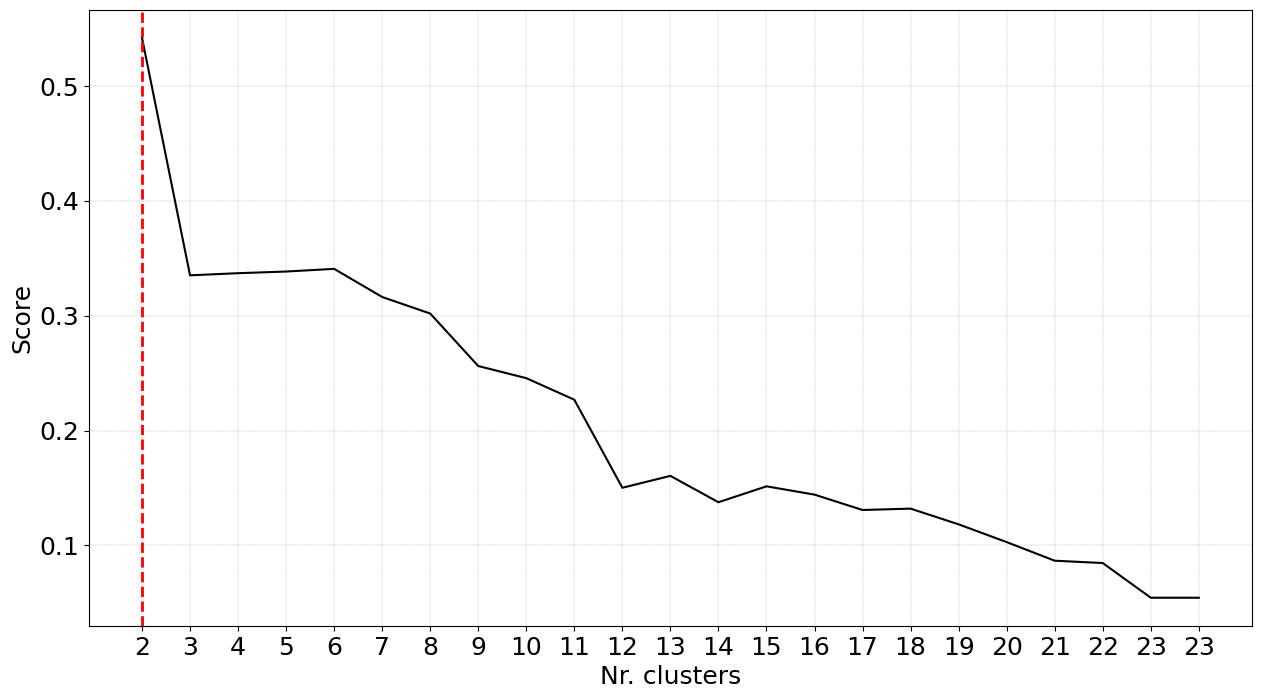

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [93]:
# Fit
ce.fit(df_array)

# Plot
ce.plot()

### Calinski-Harabasz score

In [94]:
metrics.calinski_harabasz_score(df_norm,cluster_labels)

25.00560870727315

### Davies - Bouldin Index:
Measures the similarity of clusters
The lower the score the better the seperation between your clusters

In [95]:
metrics.davies_bouldin_score(df_norm,cluster_labels)

1.057669166458565

In [98]:
## Using the report from clusteval library building 2 clusters
# Fit using agglomerative with metric: euclidean, and linkage: ward


# Applying AgglomerativeClustering with = 2 as clusters

hc_2 = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

y_hc_2 = hc_2.fit_predict(df_norm)
y_hc_2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [99]:
hc_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [100]:
cluster_labels2 = pd.Series(hc_2.labels_) 

In [105]:
df_2clust = pd.concat([cluster_labels2, df_num], axis = 1) # Imputed data

df_2clust.head()

,0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,1310.0,89,22,13.0,22704,94.0
1,0,1415.0,100,25,6.5,63575,81.0
2,0,1260.0,62,59,9.0,25026,72.0
3,0,1310.0,76,24,12.0,31510,94.0
4,0,1280.0,83,33,13.0,21864,90.0


In [106]:
df_2clust = df_2clust.rename(columns = {0:'cluster'})
df_2clust.head()

,cluster,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,1310.0,89,22,13.0,22704,94.0
1,0,1415.0,100,25,6.5,63575,81.0
2,0,1260.0,62,59,9.0,25026,72.0
3,0,1310.0,76,24,12.0,31510,94.0
4,0,1280.0,83,33,13.0,21864,90.0


In [107]:
# Aggregate using mean of each cluster
df_2clust.iloc[:, 1:7].groupby(df_2clust.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1312.345833,84.6,31.6,11.225,31470.9,90.1
1,1108.000000,53.0,69.4,17.200,11056.4,74.4


In [112]:
# Combine numerical data with categorical data
df_combined = pd.concat([df.iloc[: , :2], df_2clust], axis=1)

In [113]:
df_combined

,Univ,State,cluster,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,0,1310.000000,89,22,13.0,22704,94.0
1,CalTech,CA,0,1415.000000,100,25,6.5,63575,81.0
2,CMU,PA,0,1260.000000,62,59,9.0,25026,72.0
3,Columbia,NY,0,1310.000000,76,24,12.0,31510,94.0
4,Cornell,NY,0,1280.000000,83,33,13.0,21864,90.0
5,Dartmouth,NH,0,1340.000000,89,23,10.0,32162,95.0
6,Duke,NC,0,1315.000000,90,30,12.0,31585,95.0
7,Georgetown,DC,0,1266.916667,74,24,12.0,20126,92.0
8,Harvard,MA,0,1400.000000,91,14,11.0,39525,97.0
9,JohnsHopkins,MD,0,1305.000000,75,44,7.0,58691,87.0


In [114]:
df_combined.to_csv('University.csv', encoding = 'utf-8')

import os
os.getcwd()

'C:\\Users\\Swapnil Mishra\\Desktop\\DS_Codes_Swapnil\\Hierarchical Clustering'

In [116]:
metrics.silhouette_score(df_2clust,cluster_labels)

0.28021828004283234